# ***Spectral Partitioning vs Markov Clustering by Lindsey Kvarfordt and Owen Markley***

Create a small, obviously clustered graph. (use the one from Class 18 Markov notebook) Print graph summary and visualization.

In [47]:
import pygraphviz
import igraph
import numpy
import pandas
import csv
import networkx
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
import collections
from matplotlib import pyplot as plt
numpy.random.seed(1)

color_dict = {
    0: "#E05529", #orange from poster
    1: "#F3BF24", #yellow from poster
    2: "#B1B2B1", #dark grey from poster 
    3: "#218C8D", #tealish
    4: "#8EDC9D", #light green
    5: "#6CCECB", #light blue
    6: "white"
}

#Creating our iGraph
small_clustered_graph = pygraphviz.AGraph("test.dot")
small_clustered_graph_edges = small_clustered_graph.edges()
sc_igraph = igraph.Graph.TupleList(small_clustered_graph_edges)
sc_igraph.summary()

'IGRAPH UN-- 13 26 -- \n+ attr: name (v)'

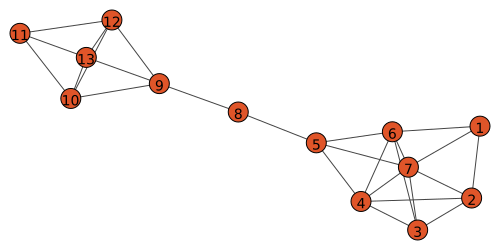

In [99]:
#Displaying the intitial small clustered graph
igraph.drawing.plot(sc_igraph, bbox=[0, 0, 500, 250], vertex_label=sc_igraph.vs()['name'], vertex_color=color_dict[0])

Create a small, non obviously clustered (same size as class 18 ??). Print graph summary and visualization.

In [3]:
#Creating our non clustered iGraph
small_unclustered_graph = pygraphviz.AGraph("not_obv_clust.dot")
small_unclustered_graph_edges = small_unclustered_graph.edges()
uc_igraph = igraph.Graph.TupleList(small_unclustered_graph_edges)
uc_igraph.summary()


'IGRAPH UN-- 19 22 -- \n+ attr: name (v)'

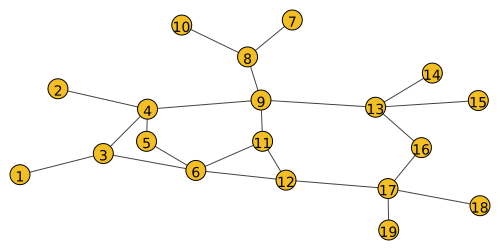

In [97]:
#Displaying the intitial non clustered graph
igraph.drawing.plot(uc_igraph,bbox=(500, 250), vertex_label=uc_igraph.vs()['name'], vertex_color=color_dict[1])

Implement a spectral clustering funciton: https://stackoverflow.com/questions/46258657/spectral-clustering-a-graph-in-python

In [55]:
sc_adj_matrix = numpy.matrix(sc_igraph.get_adjacency().data, dtype=float)
uc_adj_matrix = numpy.matrix(uc_igraph.get_adjacency().data, dtype=float)
#print(sc_adj_matrix)
#print(uc_adj_matrix)

sc_sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc_sc.fit(sc_adj_matrix)
sc_spectral_clusters = sc_sc.labels_
print(sc_spectral_clusters)


sc_uc = SpectralClustering(7, affinity='precomputed', n_init=100)
sc_uc.fit(uc_adj_matrix)
uc_spectral_clusters = sc_uc.labels_
print(uc_spectral_clusters)

[0 0 0 0 0 0 0 1 1 1 1 1 1]
[2 2 1 5 1 5 6 6 6 4 0 3 3 3 4 4 4 0 0]


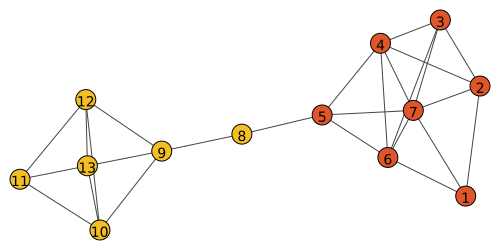

In [56]:
igraph.drawing.plot(sc_igraph, bbox=(500,250), vertex_label=sc_igraph.vs()['name'], vertex_color=[color_dict[x] for x in sc_spectral_clusters])

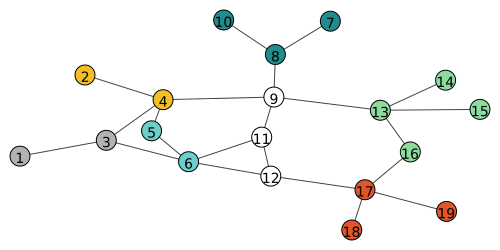

In [78]:
igraph.drawing.plot(uc_igraph , bbox=(500,250), vertex_label=uc_igraph.vs()['name'], vertex_color=[color_dict[x] for x in uc_spectral_clusters])

In [76]:
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)
A = kneighbors_graph(X, n_neighbors=5).toarray()
print(A)
AGraph = igraph.Graph.Adjacency(list(A))
print(AGraph.summary())
circle_test = SpectralClustering(2, affinity='nearest_neighbors', n_init=100)
circle_test.fit(A)
#igraph.drawing.plot(AGraph, bbox=(300, 300), vertex_size=3, edge_arrow_size=.01)

# df = pandas.read_csv("krogan.sif", 
#                      sep="\t", 
#                      quoting=csv.QUOTE_NONE,
#                      names=["species1","species2"])
# krogan_graph = igraph.Graph.TupleList(df.values.tolist())
# krogan_matrix = numpy.matrix(krogan_graph.get_adjacency().data, dtype=float)
# krogan_sc = SpectralClustering(affinity='precomputed', n_init=100)
# krogan_sc.fit(krogan_matrix)

# clust_ids = krogan_sc.labels_
# counts = [count for count in dict(collections.Counter(clust_ids)).values()]
# bins = numpy.array(range(0, max(counts)))
# plt.hist(counts, bins=bins)
# plt.show()
# numpy.argmax(clust_ids)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
IGRAPH D--- 500 2500 -- 


/home/lindsey/.local/lib/python3.6/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=2,
                   n_components=None, n_init=100, n_jobs=None, n_neighbors=10,
                   random_state=None)

Implement a markov clustering function: (see class 18)

In [59]:
#Markov Clustering Formula
def markov_cluster(graph):
    # you will need to construct an adjacency matrix; use the get_adjacency() method and then 
    # reference the '.data' attribute of the object (of class igraph.datatypes.Matrix) 
    # that was returned from `get_adjacency()`.
    adj_mat = numpy.matrix(graph.get_adjacency().data)
    
    # need to know the number of vertices; use shape (and indexing to element zero) to get that
    N = adj_mat.shape[0]
    
    # you will need to compute the vertex degrees as a numpy array
    vertex_degrees = numpy.array(graph.degree())
    
    # make a transition matrix in two steps:
    # first, compute the sum of the adjacency matrix and a parity matrix
    #   (the parity matrix can be made using using numpy.diag)
    # second, compute the inverse of the vertex_degrees diagonal matrix using numpy.diag
    #   and numpy.inalg.inv (inverse should always exist b/c we assume the graph is void-free)
    trans_mat_new = (adj_mat + numpy.diag([1]*N)) * numpy.linalg.inv(numpy.diag(vertex_degrees + 1))
    
    # initialize the "current" transition matrix as all zeros
    trans_mat = numpy.zeros([N, N])
    
    # set an iteration counter to zero; we will hard-code a max of 20 iterations below
    iter_count = 0
    
    # while the fractional change in the transition matrix (by Frobenius norm) is less than 0.01 and
    # iterations is less than 20....
    
        # note: use numpy.linalg.norm(    , ord="fro"); we are going to compute this norm for the difference
        # _and_ for the average of the current transition matrix and the new transition matrix; compute the ratio
        
    while ((numpy.linalg.norm(trans_mat_new - trans_mat, ord="fro")/
        numpy.linalg.norm(0.5*(trans_mat_new + trans_mat), ord="fro")) > 0.01 and iter_count < 20):
        
        # assign the new transition matrix to be the current transition matrix
        trans_mat = trans_mat_new
        
        # apply the expansion step with r=2, using numpy.linalg.matrix_power(   , 2)
        trans_mat_new = numpy.linalg.matrix_power(trans_mat_new, 2)
        
        # note: trans_mat_new is still a left stochastic matrix (you can check it to be sure)
        
        # now apply the inflation step with s=2, using numpy.power(  , 2)
        trans_mat_new = numpy.power(trans_mat_new, 2)
        
        # compute column sums using numpy.sum(   , axis=0)
        column_sums = numpy.sum(trans_mat_new, axis=0)
        
        # make a matrix of the column sums using numpy.repeat(    , N, axis=0); call it trans_mat_div
        trans_mat_div = numpy.repeat(column_sums, N, axis=0)
        
        # normalize the inflated matrix by element_wise dividing by trans_mat_div using numpy.divide
        trans_mat_new = numpy.divide(trans_mat_new, trans_mat_div)
        
        # increment the iteration counter
        iter_count += 1
        #print("just completed iteration: " + str(iter_count))
        
    # threshold the transition matrix at 1e-10, into a binary matrix (containing only 0 or 1 in each element)
    trans_mat_new[trans_mat_new < 1e-10]=0
    trans_mat_new[trans_mat_new > 1e-10]=1
    
    # take the transpose matrix and make a data frame out of it
    trans_mat_df = pandas.DataFrame(trans_mat_new.transpose())
    
    # each row is a "signature" corresponding to a specific cluster; drop duplicate rows
    cluster_signatures = trans_mat_df.drop_duplicates()
    
    # count the clusters and assign a numeric cluster ID to each cluster, by setting the `index` variable
    cluster_signatures.index=range(cluster_signatures.shape[0])
    
    # use pandas.merge to compute the index for each signature in the original matrix (before you dropped duplicates)
    # - make sure to call reset_index on each of the data frames that you are passing to merge
    # - in the merge call, for the left_on argument, specify the columns of cluster_signatures (list format)
    # - in the marge call, for the right_on argument, specify the columns of trans_mat_df (list_format)
    merged_df = pandas.merge(cluster_signatures.reset_index(),
                 trans_mat_df.reset_index(),
                 left_on=cluster_signatures.columns.tolist(),
                 right_on=trans_mat_df.columns.tolist())
    
    # return the "index_x" column of merged_df, in list format
    return(merged_df["index_x"].tolist())

Run each algorithm on both generated graphs. Compare results. (visually??)

In [60]:
uc_markov_clusters = markov_cluster(uc_igraph)
sc_markov_clusters = markov_cluster(sc_igraph)
print(markov_cluster(sc_igraph))
print(markov_cluster(uc_igraph))

[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6]


Run each function on the real world data from Krogan et al (see Markov notebook as well). Compare differences.

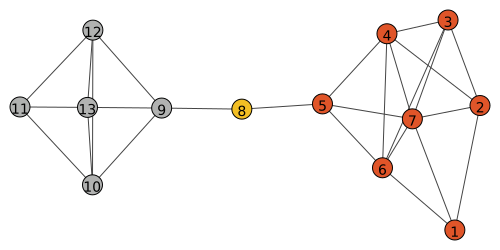

In [61]:
igraph.drawing.plot(sc_igraph, bbox=(500,250), vertex_label=sc_igraph.vs()['name'], vertex_color=[color_dict[x] for x in sc_markov_clusters])

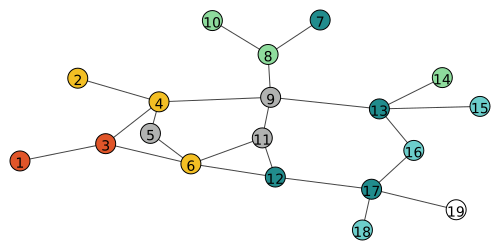

In [83]:
igraph.drawing.plot(uc_igraph, bbox=(500,250), vertex_label=uc_igraph.vs()['name'], vertex_color=[color_dict[x] for x in uc_markov_clusters])

In [63]:
markovd_agraph = markov_cluster(AGraph)
print(markovd_agraph)
#igraph.drawing.plot(uc_igraph, bbox=(500,250), vertex_label=uc_igraph.vs()['name'], vertex_color=[color_dict[x] for x in uc_markov_clusters])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 2